In [4]:
import sys
sys.path.append("..")
import lib.data as data
import lib.haar_wawelet_method.gradients as grad
import numpy as np
import lib.haar_wawelet_method.util as ut
from lib.mesurements import mse

In [2]:
import numpy as np
import lib.gradients as grad
import lib.data as data
import matplotlib.pyplot as plt
import lib.mesurements
import lib.haar_wawelet_method.haar as haar
%matplotlib inline

$\lambda_k = \frac{4}{h^2}\sin^{2}(\frac{kh}{2})$

In [3]:
def get_lamda (N,h):
    return np.array([4 / h**2 * np.sin(k * h / 2)**2 for k in range (N)])

$\mu_k = 1 - \frac{h^2}{6}\lambda_k$

In [4]:
def get_mu (N,h):
    return 1 - h**2 / 6 * get_lamda(N,h)

In [5]:
def create_L(dim):
    diag1 = np.array([2 if i == j else 0 for i in range (dim) for j in range(dim)]).reshape(dim,dim)
    diag2 = np.array([-1 if np.abs(i - j) == 1 else 0 for i in range (dim) for j in range(dim)]).reshape(dim,dim)
    return diag1 + diag2

In [6]:
def create_B(dim):
    return np.eye(dim) - 1 / 6 * create_L(dim)

In [7]:
def create_G1(dim):
    diag1 = np.array([-1 if i - j == -1 else 0 for i in range (dim) for j in range(dim)]).reshape(dim,dim)
    diag2 = np.array([1 if i - j == 1 else 0 for i in range (dim) for j in range(dim)]).reshape(dim,dim)
    return 0.5 * (diag1 + diag2)

In [8]:
def create_G2(dim):
    return create_G1(dim).T

добавить выбросы?

In [9]:
def get_F(g1, g2, h):
    size = g1.shape[0]
    #как в теории
#     mat1 = np.dot(create_B(size), create_G1(size))/h
#     F1 = np.dot(mat1, g1)
#     mat2 = np.dot(create_B(size), create_G2(size))/h
#     F2 = np.dot(mat2, g2)
#вариант 2
    mat1 = np.dot(create_G1(size), g1)/h
    F1 = np.dot(mat1, create_B(size))
    mat2 = np.dot(create_B(size), g2)/h
    F2 = np.dot(mat2, create_G2(size))

    return F1 + F2

Почему-то если умножать так $G_1g_1B + Bg_2G_2$ то метод работает для функций $x^{2k+1} + y^{2k+1}$

In [1]:
def method(g1, g2, alfa, gamma, h):
    f = np.fft.fft2(get_F(g1, g2, h))
    lamda = get_lamda(f.shape[0], h)
    mu = get_mu(f.shape[0], h)
    res = np.zeros(f.shape)
    for k in range(res.shape[0]):
        for l in range(res.shape[1]):
            res[k,l] = (lamda[k]*mu[l] + mu[k]*lamda[l] + alfa*mu[k]*mu[l] + gamma*lamda[k]*lamda[l])
    return np.fft.ifft2(f/res)

какими брать g1, g2?
делать ли преобразование фурье?


In [11]:
M = 7
x, y= data.get_plane(-np.pi, np.pi, -np.pi, np.pi, M)
h = 2*np.pi / 2**M
im = x ** 3 + y ** 3
#g1, g2 = 4 * x ** 3 + 4 * y**3  , 4 * x ** 3  + 4 * y**3
g2, g1 = 3 * y ** 2 , 3 * x**2

In [12]:
mse(im, np.abs(method(g1,g2, 900,0.02, h)))

0.13253535752570852

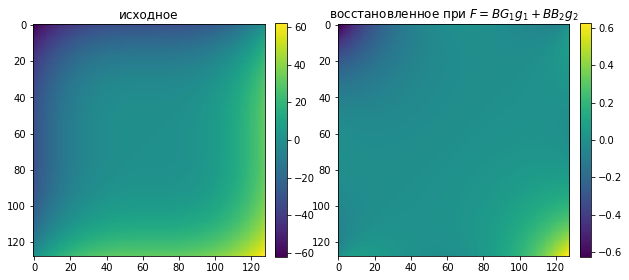

In [13]:
fig, axes = plt.subplots(1,2, figsize = (10,15))
axes[0].set_title('исходное')
img1 = axes[0].imshow(im)
img2 = axes[1].imshow(np.real(method(g1,g2,0.50,0.01, h)))
axes[1].set_title('восстановленное при $F = BG_1g_1  + BB_2g_2$')
fig.colorbar(img1, ax = axes[0],fraction=0.046, pad=0.04)
fig.colorbar(img2, ax = axes[1],fraction=0.046, pad=0.04)

#fig.savefig('variational_very_bad.png')

In [194]:
np.abs(method(g1,g2,0.50,0.01, h)).max()

0.06584607299437112

In [85]:
z = fig

In [95]:
z.savefig('sadf')